In [1]:
import os
from pprint import pprint

import mejiro
from mejiro.exposure import Exposure
from mejiro.engines.stpsf_engine import STPSFEngine
from mejiro.instruments.jwst import JWST
from mejiro.galaxy_galaxy import SampleGG
from mejiro.synthetic_image import SyntheticImage

In [2]:
jwst = JWST()

In [3]:
pprint(jwst.sky_level)

{'F115W': <Quantity 6.40801305e-05 ct / pix>,
 'F150W': <Quantity 0.00016096 ct / pix>,
 'F200W': <Quantity 0.00023699 ct / pix>,
 'F277W': <Quantity 0.00040802 ct / pix>,
 'F356W': <Quantity 0.00067714 ct / pix>,
 'F444W': <Quantity 0.00086036 ct / pix>}


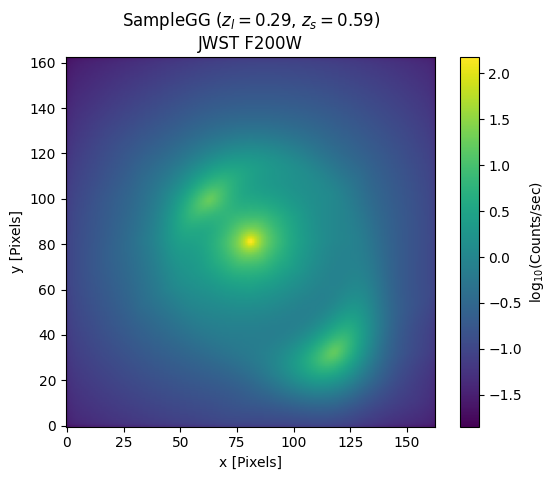

In [4]:
strong_lens = SampleGG()

band = 'F200W'

test_data_dir = os.path.join(os.path.dirname(mejiro.__path__[0]), 'tests', 'test_data')
kwargs_psf = STPSFEngine.get_jwst_psf_kwargs(band, oversample=5, num_pix=101, check_cache=True, psf_cache_dir=test_data_dir, verbose=False)

synthetic_image = SyntheticImage(strong_lens=strong_lens,
                                instrument=jwst,
                                band=band,
                                kwargs_numerics={'supersampling_factor': 5},
                                kwargs_psf=kwargs_psf,
                                verbose=False)
synthetic_image.plot()

In [6]:
synthetic_image.image.shape

(163, 163)

/grad/bwedig/mejiro/mejiro/exposure.py:123: UserWarning: Negative pixel values in final image. Setting 541 pixels to 0
  warnings.warn(f'Negative pixel values in final image. Setting {np.sum(self.exposure < 0)} pixels to 0')
/grad/bwedig/mejiro/mejiro/exposure.py:149: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(self.exposure), origin='lower')


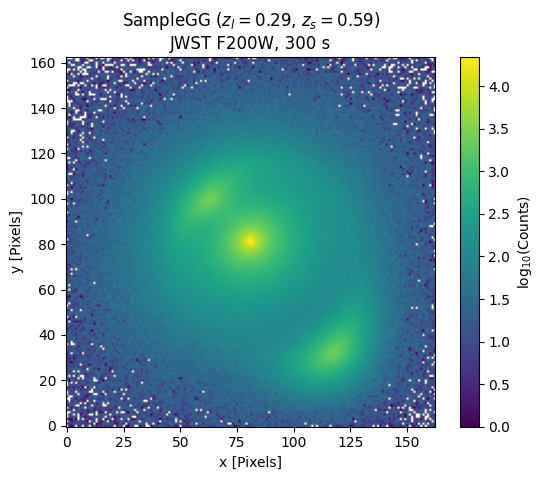

In [5]:
exposure = Exposure(synthetic_image,
                    exposure_time=300,
                    verbose=False)
exposure.plot()